This code only works when direction == 'UD' for now

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from scipy.io import loadmat
import pandas as pd
from scipy.ndimage import gaussian_filter
import os
%matplotlib inline

In [2]:
def NGD2L_TK_AS(T, epsilon, gamma, omegastar, deltastar, tau_y, Dmp):
    dt = np.mean(np.diff(T))
    dt = dt/50
    T = np.arange(0, T[-1]+dt, dt)
    x = T/tau_y /tau_y *np.exp(-T/tau_y)*dt
    
    Kw = -Dmp*( 1/np.cos(deltastar)*np.exp(-epsilon*T)*np.cos(T*omegastar+deltastar) -np.exp(-gamma*T) )
    w = np.convolve(x, Kw, 'full')[:len(T):50]*dt
    return w/(dt)

# load files 

In [3]:
BS = loadmat('D:\\GoogleDrive\\retina\\oled_boundary_set', squeeze_me =True)

exp_folder = 'D:\\GoogleDrive\\retina\\Chou\'s data\\20210513\\'

In [4]:
cn = 9

In [5]:
ExpData = loadmat(exp_folder+'merge\\merge_0224_Checkerboard_30Hz_27_15min_Br50_Q100_re', squeeze_me =True)

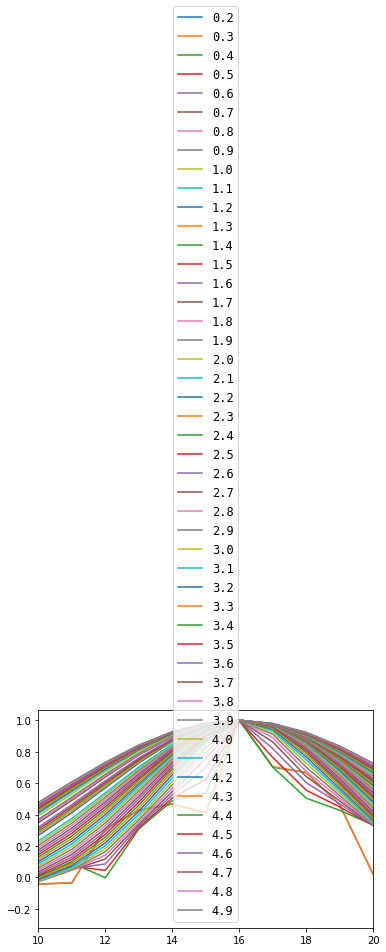

In [12]:
checkerboard = ExpData['bin_pos']
STK_list = []
for fs in np.arange(0.2, 5, 0.1):
    GFcheckerboard = np.array([gaussian_filter(cb.astype(float), fs) for cb in checkerboard])
    # GFcheckerboard = np.array([cb.astype(float) for cb in checkerboard])
    GFCcheckerboard = GFcheckerboard - np.mean(GFcheckerboard, axis = 0)
    dt = 1/60
    rstate, _ = np.histogram(ExpData['reconstruct_spikes'][cn-1], np.arange(len(checkerboard)+1)*dt)
    Taxis = np.arange(60)*dt

    STK = np.zeros([60,27,27])
    for i in range(60): #1s
        for ii in np.arange(0, len(checkerboard)-i):
            STK[i,:,:] += rstate[ii+i]*GFCcheckerboard[ii,:,:]
        STK[i,:,:] /= np.sum(rstate[:len(checkerboard)-i])

    argminSKcut = np.squeeze(STK[np.where(STK == np.min(STK))[0], :, np.where(STK == np.min(STK))[2]])
    STK_list.append(STK.copy())
    
    plt.plot(argminSKcut/ min(argminSKcut), label=str(np.round(fs, 1)))
plt.legend(loc='best', prop={'size': 'large', 'family': 'monospace'})
plt.xlim([10,20])
fig = plt.gcf()

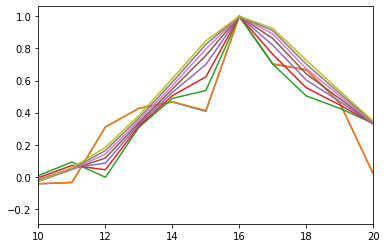

In [22]:
for STK in STK_list[:9]:
    argminSKcut = np.squeeze(STK[np.where(STK == np.min(STK))[0], :, np.where(STK == np.min(STK))[2]])
    
    
    plt.plot(argminSKcut/ min(argminSKcut))
plt.xlim([10,20])
fig = plt.gcf()

C:\Users\llinc\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
C:\Users\llinc\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\llinc\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
C:\Users\llinc\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\llinc\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  


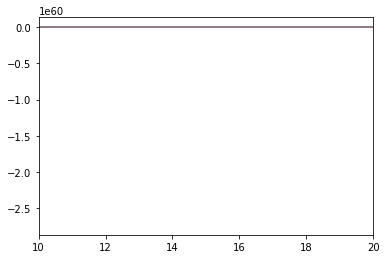

In [26]:
def Gaussian_filter_1d(x,s):
    return(np.exp(-(x/s)**2/2))

i = 0
for fs in np.arange(0.2, 5, 0.1):
    STK = STK_list[i]
    argminSKcut = np.squeeze(STK[np.where(STK == np.min(STK))[0], :, np.where(STK == np.min(STK))[2]])
    argminSKcut = argminSKcut/Gaussian_filter_1d(np.arange(27)-np.where(STK == np.min(STK))[1],fs)
    
    plt.plot(argminSKcut/ min(argminSKcut))
    i += 1
plt.xlim([10,20])
fig = plt.gcf()

In [28]:
Gaussian_filter_1d(np.arange(27)-np.where(STK == np.min(STK))[1],0.1)

array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 3.69388307e-196, 1.38389653e-087, 1.92874985e-022,
       1.00000000e+000, 1.92874985e-022, 1.38389653e-087, 3.69388307e-196,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000])